# Testing dataset loading

This notebook contains code that run the pipeline we have created to analyze a set of datasets.

In [1]:
# adding the project root inside the python path
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

In [2]:
# The path where the dataset are stored
DATASET_PATH: str = "../../dataset/first_disease_sel/"
DISEASE_COLNAME: str = 'DISEASE'

In [3]:
from analysis.dataset import load_datasets, compute_ds_col_intersection, clean_datasets, build_dataset, scale_minmax

### Load datasets

In [4]:
# Load dataset
datasets = load_datasets(DATASET_PATH)
# compute intersection
colname_intersection = compute_ds_col_intersection(datasets)
# clean datasets
datasets = clean_datasets(datasets, colname_intersection)

INFO:root:Skipping file ../../dataset/first_disease_sel/.DS_Store
INFO:root:Inspecting directory ../../dataset/first_disease_sel/GS
INFO:root:Setting disease as GS
INFO:root:Inspecting directory ../../dataset/first_disease_sel/NALD
INFO:root:Setting disease as NALD
INFO:root:Inspecting directory ../../dataset/first_disease_sel/A1A
INFO:root:Setting disease as A1A
INFO:root:Inspecting directory ../../dataset/first_disease_sel/MCM
INFO:root:Setting disease as MCM
INFO:root:Inspecting directory ../../dataset/first_disease_sel/DIABETE
INFO:root:Setting disease as DIABETE


## Scaling

In [ ]:
datasets_normalized = scale_minmax(datasets)

## Building unique DS

In [ ]:
# finally build the unique dataset
dataset = build_dataset(datasets_normalized)
dataset

## Inspecting dataset we have built

In [ ]:
dataset['DISEASE']

In [ ]:
# plotting the number of sample for each disease
disease = dataset['DISEASE'].value_counts()
print(disease)
disease.plot.bar()

In [ ]:
import matplotlib.pyplot as plt
from bioinfokit import analys, visuz
import numpy as np

In [ ]:
visuz.gene_exp.hmap(df=dataset.astype(float), rowclus=False, colclus=False, dim=(10, 10), tickfont=(2, 4), show=True)

In [8]:
# plotting the number of sample for each disease
disease = dataset['DISEASE'].value_counts()
print(disease)
disease.plot.bar()

KeyError: 'DISEASE'

In [10]:
import matplotlib.pyplot as plt
from bioinfokit import analys, visuz
import numpy as np

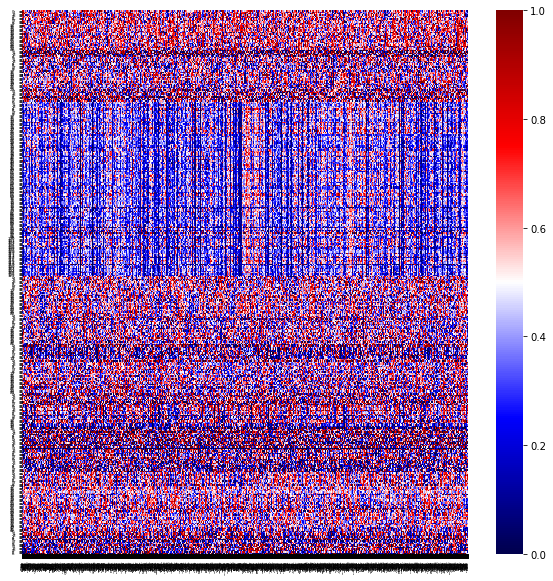

In [11]:
visuz.gene_exp.hmap(df=dataset.astype(float), rowclus=False, colclus=False, dim=(10, 10), tickfont=(2, 4), show=True)